# **Maternal Health Risk Prediction (MATERN_AI)**

This notebook aims to build a Classical ML Algorithm(Logistic Regression and XGBoost) and compare it to a Neural Network Model that has been optimized using Tensorflow to predict maternal risks for pregnant patients.

More context can be found here: https://docs.google.com/document/d/1xnnj8wq3rHsqiU6VgBP0DfMDTO1EZ9WXXSz1G3YgdLc/edit?usp=sharing




**ABOUT DATASET**

The dataset used here is publicly available from Kaggle: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data/data

**Variables**

*Age* - This is age in years when a woman is pregnant.

*SystolicBP* - The upper value of Blood Pressure in mmHg.

*DiastolicBP* - Lower value of Blood Pressure in mmHg.

*BS* - Blood glucose levels in terms of molar concentration, mmol/L.

*HeartRate* - A normal resting heart rate in beats per minute.

*Risk Level* - Predicted Risk Intensity Level during pregnancy considering the previous attributes.


**IMPLEMENTATION**

*   Classical ML Algorithm - Logistic Regression, XGBoost.

*   Vanilla Neural Network Model - Simple Neural Network without any optimization techniques.

*   Neural Network implementing atleast 3 different optimization techniques.



Finally, we'll make predictions using test data.

**DATASET LOADING**

In [96]:
from google.colab import files
uploaded = files.upload()

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "Maternal Health Risk Data Set.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows
print("\nDataset Preview:")
(df.head())

Saving Maternal Health Risk Data Set.csv to Maternal Health Risk Data Set (1).csv

Dataset Preview:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


**DATASET CLEANING**

In [97]:
# Check for missing values
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [98]:
# Check the data types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [99]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 562


In [100]:
# Drop the duplicate rows identified above
df = df.drop_duplicates()

# Confirm all duplicates have been removed
df.duplicated().sum()

0

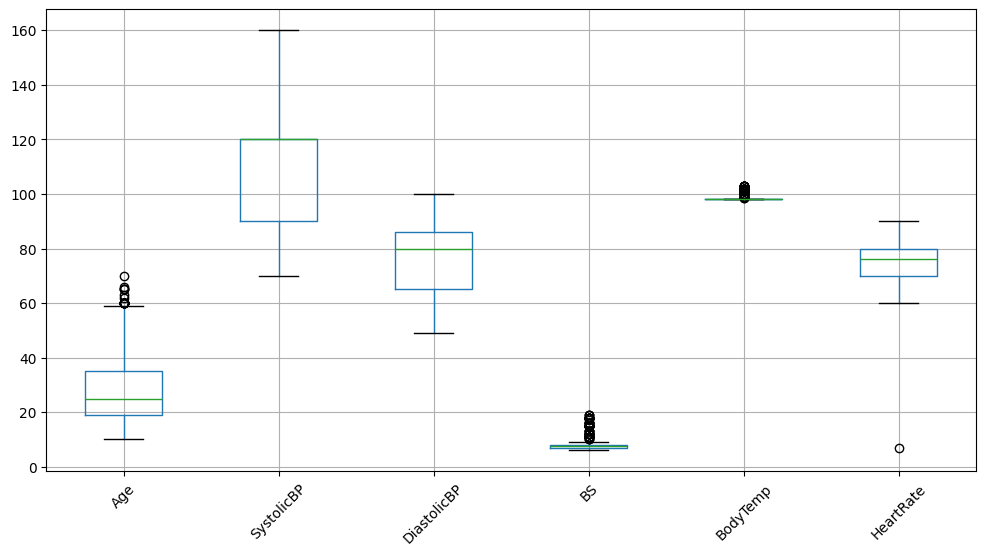

In [101]:
# Plot boxplots to check for outliers
plt.figure(figsize = (12,6))
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

From the boxplots above, there seems to be an outlier in the heart rate. We'll explore the value and figure how to remove the outlier.

In [102]:
# Summary statistics of our dataset
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


From the summary above, there seems to be a wrong value in the minimum of heart rate which is 7, as identified earlier as an outlier. Realistically, the value doesn't make sense and therefore I'll change it to the mode value.

In [103]:
# Locate where the value of the heart rate of 7 is
df[df['HeartRate'] == 7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk


In [104]:
# Replace the value with the mode value
df['HeartRate'] = df['HeartRate'].replace(7, df['HeartRate'].mode()[0])

In [105]:
# Display summary statistics to ensure everything is now okay.
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,74.088496
std,13.767379,17.872282,13.754578,2.829209,1.410897,7.524161
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [107]:
# The output is a categorical variable and therefore will encode it to numerical values.

# High risk-2, mid risk-1, low risk- 0
df["RiskLevel"] = df["RiskLevel"].replace({"high risk": 2, "mid risk": 1, "low risk": 0})

# Display table with encoded values
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [111]:
# Check the categories in my output variable
print(df['RiskLevel'].unique())

[2 0 1]


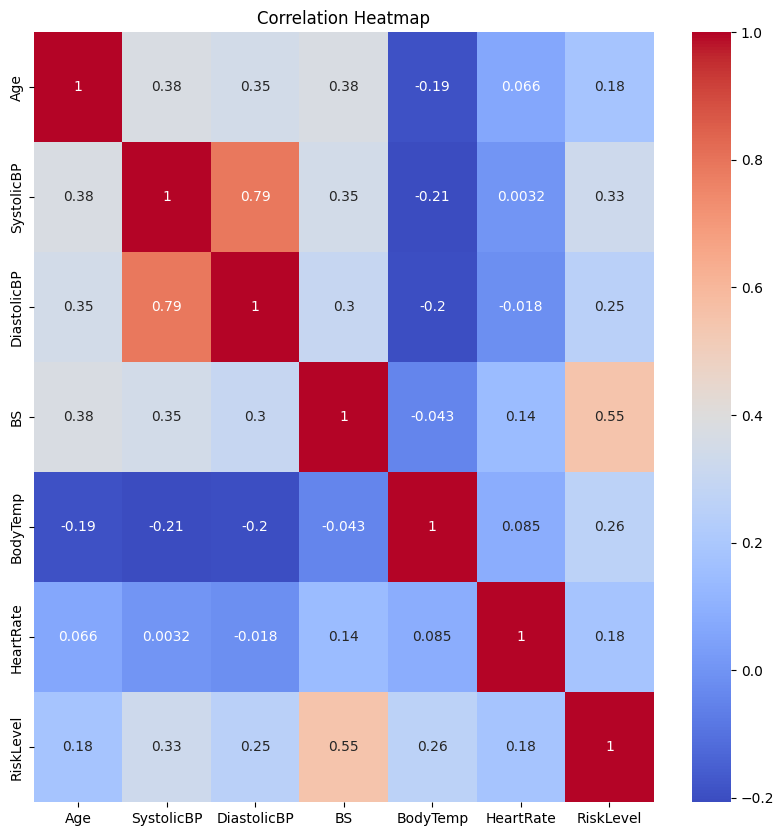

In [112]:
# Visualize the relations using a correlation heat map
correlation_matrix = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is a positive correlation between the input variables and the output variables.

The strongest one is in Blood Sugar with 0.55. Age and heartache are the weakest with 0.18 respectively.

Stystolic BP and Diastolic BP are strongly correlated with value of 0.79. As Systolic BP increases, Diastolic BP also tends to increase.

In [113]:
# Check the class distribution
df['RiskLevel'].value_counts()

,count
RiskLevel,
0,234
2,112
1,106


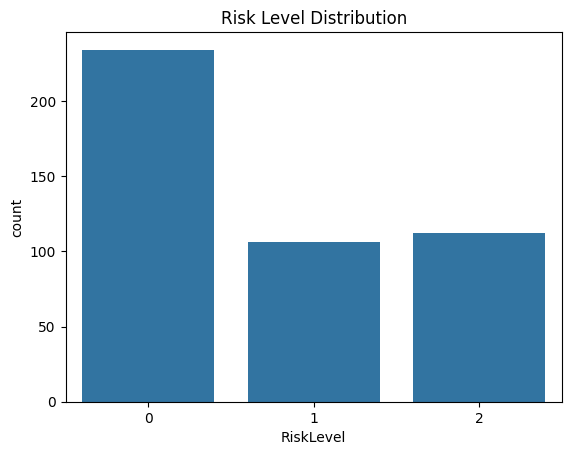

In [114]:
# Visualize the distribution of the target variable
sns.countplot(x = df["RiskLevel"])
plt.title("Risk Level Distribution")
plt.show()


*   There is a class imbalance in my dataset.

*   Low risk pregnancies are most frequent with 234 instances. Followed by high risk at 112 and mid risk at 106.

*   This might lead to a bias towards predicting the majority class. As we proceed, we'll use techniques such as class weights to handle the imbalance.

**DATA PRE-PROCESSING**

In [115]:
from sklearn.model_selection import train_test_split

# Define my input (X) and target (y) variables
X = df.drop(columns=["RiskLevel"])  # Features
y = df["RiskLevel"]  # Target variable

# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

# Second split: Validation (15%) and Test (15%) from Temp (30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42, stratify = y_temp)

# Print dataset shapes
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (316, 6)
Validation set: (68, 6)
Test set: (68, 6)


In [116]:
# Scale to ensure that training data is standard for all.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**IMPLEMENTING VARIOUS CLASSICAL ML ALGORITHMS WITH TUNED HYPERPARAMETERS**

a) LOGISTIC REGRESSION

Training Accuracy: 0.5853
Validation Accuracy: 0.6324
Test Accuracy: 0.7353

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.56      0.31      0.40        16
           2       0.71      0.88      0.79        17

    accuracy                           0.74        68
   macro avg       0.69      0.68      0.67        68
weighted avg       0.72      0.74      0.71        68



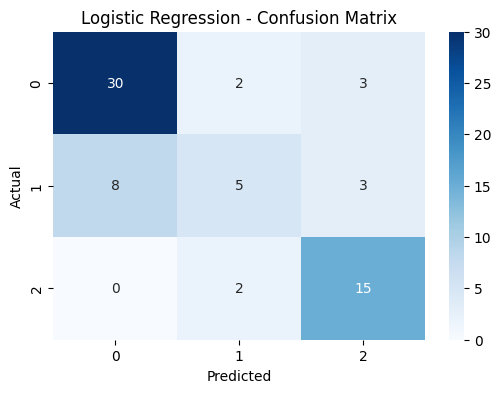

In [119]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# We'll apply SMOTE to try handle the class imbalance of our dataset
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define hyperparameters for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize the model
log_reg = LogisticRegression(max_iter = 1000)

# Perform GridSearchCV
grid_search_logreg = GridSearchCV(log_reg, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search_logreg.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_logreg = grid_search_logreg.best_estimator_

# Predictions
y_val_pred_logreg = best_logreg.predict(X_val)
y_test_pred_logreg = best_logreg.predict(X_test)

# Accuracy
print("Training Accuracy: {:.4f}".format(grid_search_logreg.best_score_))
print("Validation Accuracy: {:.4f}".format(accuracy_score(y_val, y_val_pred_logreg)))
print("Test Accuracy: {:.4f}".format(accuracy_score(y_test, y_test_pred_logreg)))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_logreg, zero_division = 1))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_logreg), annot = True, fmt = "d", cmap = "Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

b) XG BOOST

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:49:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.7279
Validation Accuracy: 0.7647
Test Accuracy: 0.7353

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.50      0.25      0.33        16
           2       0.76      0.76      0.76        17

    accuracy                           0.74        68
   macro avg       0.68      0.65      0.65        68
weighted avg       0.70      0.74      0.71        68



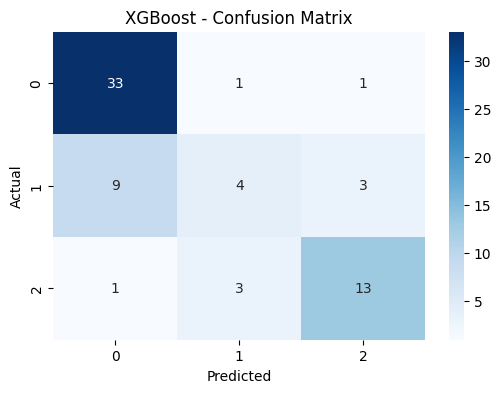

In [122]:
from xgboost import XGBClassifier

# Define hyperparameter distribution
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss')

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search_xgb.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions
y_val_pred_xgb = best_xgb.predict(X_val)
y_test_pred_xgb = best_xgb.predict(X_test)

# Accuracy
print(f"Training Accuracy: {grid_search_xgb.best_score_:.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred_xgb):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_xgb))

# Confusion Matrix
plt.figure(figsize = (6,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb), annot = True, fmt = "d", cmap = "Blues")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**MY MODEL ARCHITECTURE**

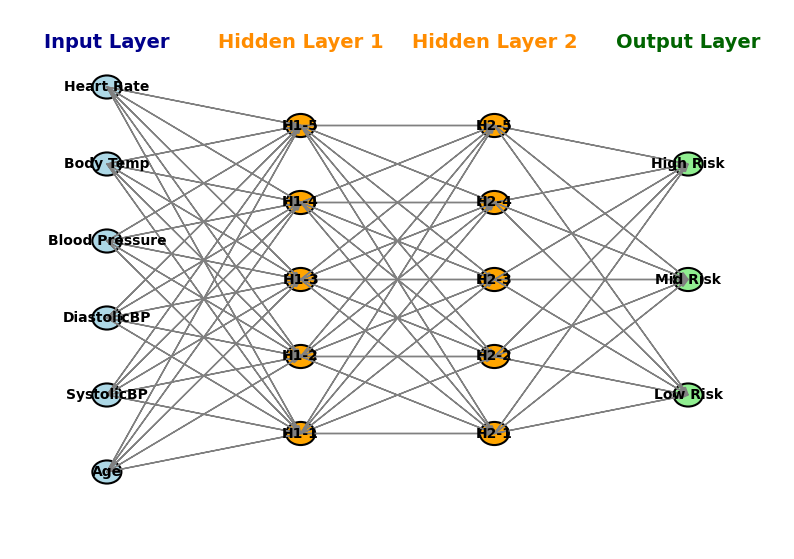

In [147]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_node(ax, center, radius, color, label=None):
    circle = patches.Circle(center, radius, color = color, ec = "black", lw = 1.5)
    ax.add_patch(circle)
    if label:
        ax.text(center[0], center[1], label, ha = 'center', va = 'center', fontsize = 10, fontweight = 'bold', color = 'black')

def draw_connection(ax, start, end):
    ax.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1],
             head_width = 0.05, head_length = 0.1, fc = 'gray', ec = 'gray', length_includes_head = True)

def visualize_pipeline():
    fig, ax = plt.subplots(figsize = (10, 7))
    ax.set_xlim(-1, 7)
    ax.set_ylim(-1, 6)
    ax.axis('off')

    # Input Layer
    input_nodes = [(0, y) for y in [0, 1, 2, 3, 4, 5]]  # Six input features
    input_features = ['Age', 'SystolicBP', 'DiastolicBP', 'Blood Pressure', 'Body Temp', 'Heart Rate']

    for idx, node in enumerate(input_nodes):
        draw_node(ax, node, radius = 0.15, color = 'lightblue', label = input_features[idx])

    # Hidden Layer 1
    hidden1_nodes = [(2, y) for y in [0.5, 1.5, 2.5, 3.5, 4.5]]
    for idx, node in enumerate(hidden1_nodes):
        draw_node(ax, node, radius = 0.15, color = 'orange', label = f'H1-{idx+1}')

    # Hidden Layer 2
    hidden2_nodes = [(4, y) for y in [0.5, 1.5, 2.5, 3.5, 4.5]]
    for idx, node in enumerate(hidden2_nodes):
        draw_node(ax, node, radius = 0.15, color = 'orange', label = f'H2-{idx+1}')

    # Output Layer (Multi-Class Classification)
    output_nodes = [(6, y) for y in [1, 2.5, 4]]  # Three outputs: Low, Mid, High Risk
    output_labels = ['Low Risk', 'Mid Risk', 'High Risk']
    for idx, node in enumerate(output_nodes):
        draw_node(ax, node, radius = 0.15, color = 'lightgreen', label = output_labels[idx])

    # Connections
    for start in input_nodes:
        for end in hidden1_nodes:
            draw_connection(ax, start, end)

    for start in hidden1_nodes:
        for end in hidden2_nodes:
            draw_connection(ax, start, end)

    for start in hidden2_nodes:
        for end in output_nodes:
            draw_connection(ax, start, end)

    # Titles and Legend
    ax.text(0, 5.5, 'Input Layer', ha = 'center', fontsize = 14, fontweight = 'bold', color = 'darkblue')
    ax.text(2, 5.5, 'Hidden Layer 1', ha = 'center', fontsize = 14, fontweight = 'bold', color = 'darkorange')
    ax.text(4, 5.5, 'Hidden Layer 2', ha = 'center', fontsize = 14, fontweight = 'bold', color = 'darkorange')
    ax.text(6, 5.5, 'Output Layer', ha = 'center', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

    plt.show()

# Run visualization
visualize_pipeline()

**IMPLEMENTING NEURAL NETWORK MODELS**

a) BASIC NEURAL NETWORK MODEL - VANILLA MODEL WITHOUT ANY TUNING OR OPTIMIZATION.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_162 (Dense)                    │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3659 - loss: 1.0805 - val_accuracy: 0.5000 - val_loss: 1.0193
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5312 - loss: 0.9967 - val_accuracy: 0.5735 - val_loss: 0.9776
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6033 - loss: 0.9640 - val_accuracy: 0.6029 - val_loss: 0.9472
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6174 - loss: 0.9465 - val_accuracy: 0.5882 - val_loss: 0.9226
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6104 - loss: 0.9176 - val_accuracy: 0.6029 - val_loss: 0.9022
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6358 - loss: 0.8668 - val_accuracy: 0.6176 - val_loss: 0.8844
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6252 - loss: 0.8778 - val_accuracy: 0.6471 - val_loss: 0.8682
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5950 - loss: 0.8806 - val_accuracy: 0.6471 - v

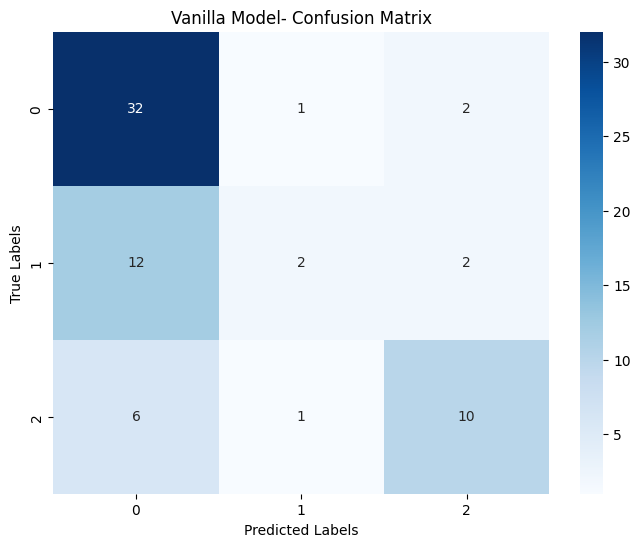

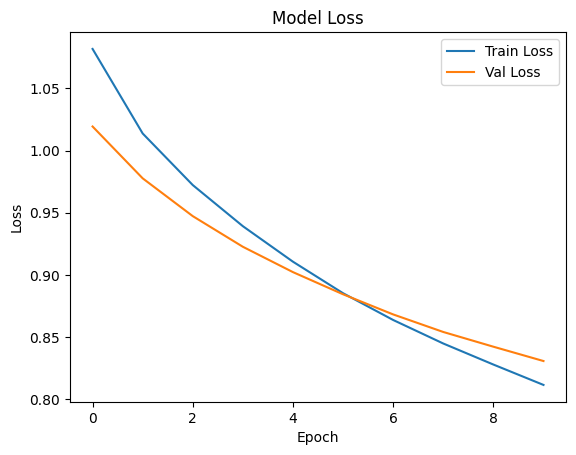

In [125]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define my vanilla model
vanilla_model = Sequential([
    Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)),  # Input layer
    Dense(16, activation = 'relu'),  # Hidden layer
    Dense(len(set(y_train)), activation = 'softmax')  # Output layer
])

# Display model summary
vanilla_model.summary()

# Compile the model (set to default)
vanilla_model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model
history = vanilla_model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_val, y_val))

# Retrieve training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Evaluate on test set
test_loss, test_acc = vanilla_model.evaluate(X_test, y_test)

# Predict class labels
y_pred_probs = vanilla_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis = 1)

# Print accuracy metrics
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = set(y_train), yticklabels = set(y_train))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Vanilla Model- Confusion Matrix")
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.show()


*   The data set has class imbalance which greatly affects the model.

*   There is room for optimization to try and improve the model performance.

*   There is also signs of overfitting, the accuracy is also not optimal, meaning the model can be improved by fine tuning parameters.

**OPTIMIZED NEURAL NETWORK MODELS**

a) NEURAL NETWORK MODEL IMPLEMENTING ADAM OPTIMIZER

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3108 - loss: 1.5416 - val_accuracy: 0.3235 - val_loss: 1.0914 - learning_rate: 0.0010
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4100 - loss: 1.1523 - val_accuracy: 0.4412 - val_loss: 1.0278 - learning_rate: 0.0010
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4573 - loss: 1.0305 - val_accuracy: 0.6029 - val_loss: 0.9731 - learning_rate: 0.0010
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6282 - loss: 0.8754 - val_accuracy: 0.6324 - val_loss: 0.9327 - learning_rate: 0.0010
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5700 - loss: 0.8896 - val_accuracy: 0.6618 - val_loss: 0.9023 - learning_rate: 0.0010
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6466 - loss: 0.7979 - val_accuracy: 0.6912 - val_loss: 0.8782 - learning_rate: 0.0010
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6588 - loss: 0.7980 - val_accuracy

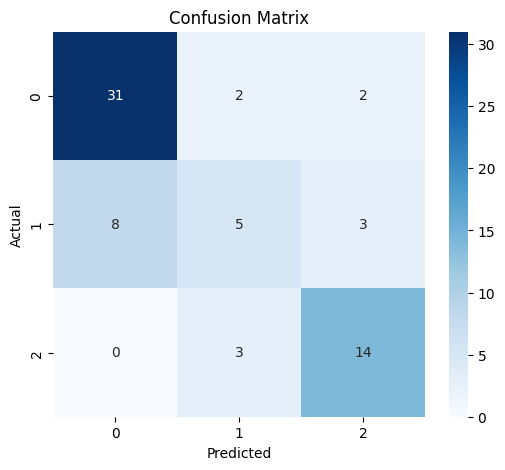

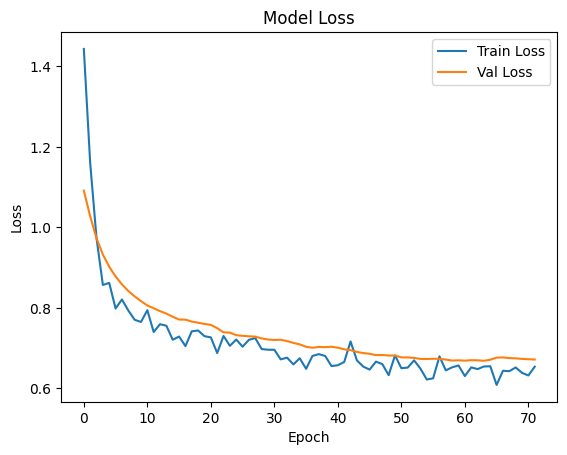

In [126]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the number of output classes
num_classes = len(np.unique(y_train))

# Function to create my adam optimized model
def create_model(learning_rate = 0.001, l2_lambda = 0.0001, dropout_rate = 0.1):
    adam_model = Sequential([
        Dense(64, kernel_regularizer = l2(l2_lambda), input_shape = (X_train.shape[1],)),
        BatchNormalization(),
        keras.layers.ReLU(),
        Dropout(dropout_rate),

        Dense(32, kernel_regularizer = l2(l2_lambda)),
        BatchNormalization(),
        keras.layers.ReLU(),
        Dropout(dropout_rate),

        Dense(num_classes, activation = 'softmax')  # Output layer
    ])

    adam_model.compile(optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return adam_model

# Define callbacks that my model will use
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 8, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 3, min_lr = 1e-5)

# Train the model
adam_model = create_model()
history = adam_model.fit(X_train, y_train, epochs = 150, batch_size = 32,
                    validation_data = (X_val, y_val),
                    callbacks = [early_stopping, reduce_lr],
                    verbose = 1)

# Retrieve training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Evaluate on test set
test_loss, test_acc = adam_model.evaluate(X_test, y_test)

# Predictions
y_pred = adam_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis = 1)

# Print accuracies
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize = (6, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = np.unique(y_test), yticklabels = np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.show()

b) NEURAL NETWORK MODEL IMPLEMENTING SGD OPTIMIZER

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.4508 - loss: 1.2494 - val_accuracy: 0.4412 - val_loss: 1.1014 - learning_rate: 0.0050
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5109 - loss: 1.1290 - val_accuracy: 0.5147 - val_loss: 1.0767 - learning_rate: 0.0050
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5453 - loss: 1.0232 - val_accuracy: 0.5294 - val_loss: 1.0559 - learning_rate: 0.0050
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5647 - loss: 1.0028 - val_accuracy: 0.5882 - val_loss: 1.0404 - learning_rate: 0.0050
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6166 - loss: 0.9419 - val_accuracy: 0.6618 - val_loss: 1.0260 - learning_rate: 0.0050
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.6132 - loss: 0.9568 - val_accuracy: 0.6471 - val_loss: 1.0132 - learning_rate: 0.0050
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6292 - loss: 0.9238 - val_accuracy

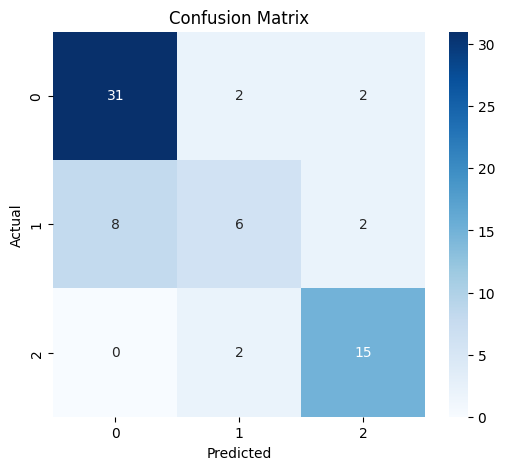

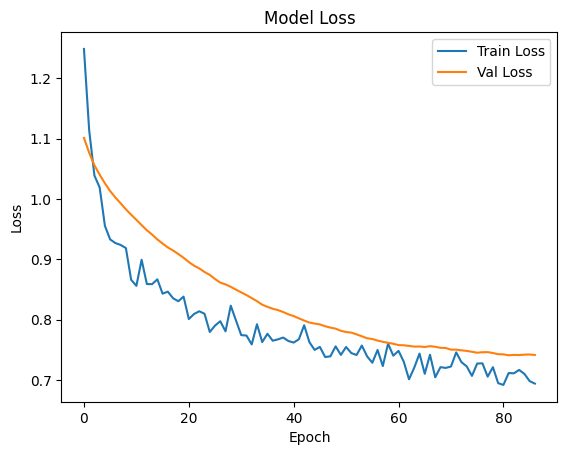

In [132]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

# Function to create an optimized model with SGD optimizer
def create_model(learning_rate = 0.005, l2_lambda = 0.0001, dropout_rate = 0.1, momentum = 0.7):
    sgd_model = Sequential([
        Dense(64, kernel_regularizer = l2(l2_lambda), input_shape = (X_train.shape[1],)),
        BatchNormalization(),  # Decided to normalize before activation
        keras.layers.ReLU(),
        Dropout(dropout_rate),

        Dense(32, kernel_regularizer = l2(l2_lambda)),
        BatchNormalization(),
        keras.layers.ReLU(),
        Dropout(dropout_rate),

        Dense(len(set(y_train)), activation = 'softmax')  # Output layer
    ])

    # Compiling the model
    sgd_model.compile(optimizer = keras.optimizers.SGD(learning_rate = learning_rate, momentum = momentum, nesterov = True),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

    return sgd_model

# Define callbacks
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor ='val_loss', factor = 0.5, patience = 3, min_lr = 0.00001)

# Train the model
sgd_model = create_model()
history = sgd_model.fit(X_train, y_train, epochs = 100, batch_size = 64,
                    validation_data = (X_val, y_val),
                    callbacks = [early_stopping, reduce_lr],
                    verbose = 1)

# Retrieve training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Evaluate on test set
test_loss, test_acc = sgd_model.evaluate(X_test, y_test)

# Predictions
y_pred = sgd_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis = 1)

# Print accuracies
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize = (6, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = np.unique(y_test), yticklabels = np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.show()

c) NEURAL NETWORK MODEL IMPLEMENTING RMSPROP OPTIMIZER

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.3258 - loss: 1.2689 - val_accuracy: 0.5441 - val_loss: 1.0556 - learning_rate: 5.0000e-04
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4460 - loss: 1.0456 - val_accuracy: 0.5735 - val_loss: 1.0306 - learning_rate: 5.0000e-04
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4880 - loss: 0.9858 - val_accuracy: 0.6324 - val_loss: 1.0072 - learning_rate: 5.0000e-04
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5912 - loss: 0.9434 - val_accuracy: 0.6765 - val_loss: 0.9825 - learning_rate: 5.0000e-04
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5359 - loss: 0.9245 - val_accuracy: 0.6618 - val_loss: 0.9632 - learning_rate: 5.0000e-04
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5772 - loss: 0.8876 - val_accuracy: 0.6765 - val_loss: 0.9419 - learning_rate: 5.0000e-04
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5436 - los

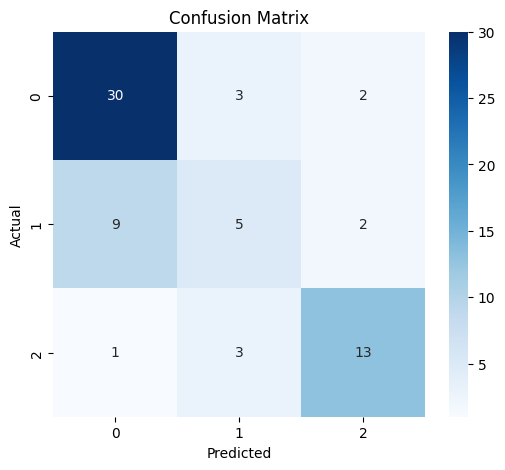

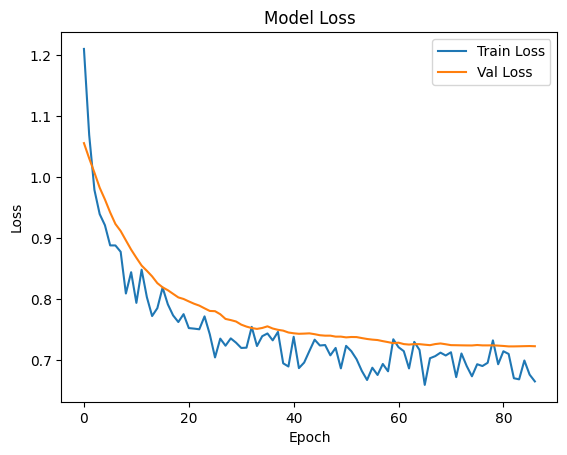

In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

# Function to create an optimized model with RMSprop optimizer
def create_model(learning_rate = 0.0005, l2_lambda = 0.0001, dropout_rate = 0.1, rho = 0.95):
    rmsprop_model = Sequential([
        Dense(64, kernel_regularizer = l2(l2_lambda), input_shape = (X_train.shape[1],)),
        BatchNormalization(),
        keras.layers.ReLU(),
        Dropout(dropout_rate),

        Dense(32, kernel_regularizer = l2(l2_lambda)),
        BatchNormalization(),
        keras.layers.ReLU(),
        Dropout(dropout_rate),

        Dense(len(set(y_train)), activation = 'softmax')  # Output layer
    ])

    # Compiling my model
    rmsprop_model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = learning_rate, rho = rho),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

    return rmsprop_model

# Define callbacks
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 3, min_lr = 0.00001)

# Train the model
rmsprop_model = create_model()
history = rmsprop_model.fit(X_train, y_train, epochs = 150, batch_size = 32,
                    validation_data = (X_val, y_val),
                    callbacks = [early_stopping, reduce_lr],
                    verbose = 1)

# Retrieve training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Evaluate on test set
test_loss, test_acc = rmsprop_model.evaluate(X_test, y_test)

# Predictions
y_pred = rmsprop_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis = 1)

# Accuracies
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize = (6, 5))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = np.unique(y_test), yticklabels = np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.show()

**SAVING MY MODELS**

In [140]:
# Logistic Regression Model
import joblib

joblib.dump(best_logreg, "logistic_regression.pkl")
print("Logistic Regression model saved successfully!")

Logistic Regression model saved successfully!


In [141]:
# XG Boost Model
import joblib

joblib.dump(best_xgb, "XG_Boost.pkl")
print("XG Boost model saved successfully!")

XG Boost model saved successfully!


In [142]:
# Vanilla Neural Network Model
vanilla_model.save("maternal_health_vanilla.keras")
print("Vanilla Neural Network model saved successfully!")

Vanilla Neural Network model saved successfully!


In [143]:
# Adam Optimizer Neural Network Model
adam_model.save("maternal_health_adam.keras")
print("Adam Optimizer Neural Network model saved successfully!")

Adam Optimizer Neural Network model saved successfully!


In [144]:
# SGD Optimizer Neural Network Model
sgd_model.save("maternal_health_sgd.keras")
print("SGD Optimizer Neural Network model saved successfully!")

SGD Optimizer Neural Network model saved successfully!


In [145]:
# RMSPROP Neural Network Model
rmsprop_model.save("maternal_health_rmsprop.keras")
print("RMSProp Optimizer Neural Network model saved successfully!")

RMSProp Optimizer Neural Network model saved successfully!


**TESTING MY MODELS**

a) Testing using SGD Optimizer Model

In [151]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
sgd_model = load_model("maternal_health_sgd.keras")

# Make predictions on the test set (raw probabilities)
nn_probs = sgd_model.predict(X_test)

# Convert to class labels
if nn_probs.shape[1] > 1:
    y_test_pred_nn_labels = nn_probs.argmax(axis=1)
else:
    y_test_pred_nn_labels = (nn_probs > 0.5).astype(int)

# Print first 10 predictions
print("Predictions (First 10):", y_test_pred_nn_labels[:10].flatten())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predictions (First 10): [1 0 2 0 1 2 0 0 0 0]


b) Testing using Adam Optimizer Model

In [152]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
adam_model = load_model("maternal_health_adam.keras")

# Make predictions on the test set (raw probabilities)
nn_probs = adam_model.predict(X_test)

# Convert to class labels
if nn_probs.shape[1] > 1:
    y_test_pred_nn_labels = nn_probs.argmax(axis=1)
else:
    y_test_pred_nn_labels = (nn_probs > 0.5).astype(int)

# Print first 10 predictions
print("Predictions (First 10):", y_test_pred_nn_labels[:10].flatten())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predictions (First 10): [1 0 2 0 1 2 0 0 0 0]


c) Testing using RMSProp Optimizer Model

In [153]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
rmsprop_model = load_model("maternal_health_adam.keras")

# Make predictions on the test set (raw probabilities)
nn_probs = rmsprop_model.predict(X_test)

# Convert to class labels
if nn_probs.shape[1] > 1:
    y_test_pred_nn_labels = nn_probs.argmax(axis=1)
else:
    y_test_pred_nn_labels = (nn_probs > 0.5).astype(int)

# Print first 10 predictions
print("Predictions (First 10):", y_test_pred_nn_labels[:10].flatten())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predictions (First 10): [1 0 2 0 1 2 0 0 0 0]


d) Testing using Logistic Regression and XG Boost Models

In [154]:
import joblib

# Load the trained logistic regression model
best_logreg = joblib.load("logistic_regression.pkl")

# Make predictions
y_test_pred_best_logreg = best_logreg.predict(X_test)

# Print first 10 predictions
print("Logistic Regression Predictions (First 10):", y_test_pred_best_logreg[:10])

# Load the trained XGBoost model
best_xgb = joblib.load("XG_Boost.pkl")

# Make predictions
y_test_pred_xgb = best_xgb.predict(X_test)

# Print first 10 predictions
print("XGBoost Predictions (First 10):", y_test_pred_xgb[:10])

Logistic Regression Predictions (First 10): [1 0 1 0 2 2 0 0 0 0]
XGBoost Predictions (First 10): [1 0 0 0 1 2 0 0 0 0]
